In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import *

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [7]:
# displaying a random digit from data set

random_int = np.random.randint(70000)
digit = X.iloc[0]
digit

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

9


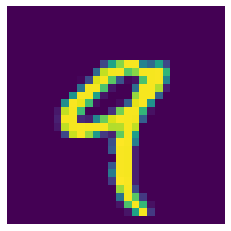

In [8]:
# displaying a random  digit in mnist data set

random_int = np.random.randint(5)
some_digit = X.iloc[random_int]
some_digit_image = np.array(some_digit).reshape(28, 28)
print(y[random_int])
plt.imshow(some_digit_image)
plt.axis('off')
plt.show()

5


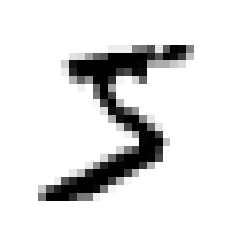

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
print(y.iloc[0])
some_digit_image = np.array(some_digit).reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()


In [10]:
# creating training and test set
# first 60,000 are training set and the next 10,000 are test set

X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

In [11]:
# lets shuffle the training set for better performance

shuffle_index = np.random.permutation(60000)
shuffle_index
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]


In [12]:
# shuffle index performance example

a = np.arange(10)
print(a)

df = pd.DataFrame(a)
shuffle_index = np.random.permutation(len(a))
df.iloc[shuffle_index]

[0 1 2 3 4 5 6 7 8 9]


,0
6,6
4,4
8,8
7,7
1,1
9,9
0,0
3,3
5,5
2,2


In [13]:
y_train_5 = y_train == 5
y_train_5

36699    False
23737    False
14780    False
7700     False
5523     False
         ...  
41087    False
5861     False
26279    False
57253    False
14299    False
Name: class, Length: 60000, dtype: bool

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [35]:

print(sgd_classifier.predict([some_digit]))


['4']


/home/borhan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
